In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom, bernoulli

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

In [2]:
N = 1000

In [3]:
SIGMA = 0.2
x = norm.rvs(size=N)
alpha , beta = np.random.rand(), np.random.rand()
alpha , beta, SIGMA 

(0.1281833723005652, 0.8331499626352135, 0.2)

In [4]:
y = 3 + alpha*x + SIGMA*norm.rvs(size=N)
z = 5 + beta*x + SIGMA*norm.rvs(size=N)

In [5]:
df = pd.DataFrame({'x':x,
             'y':y,
             'z':z,})

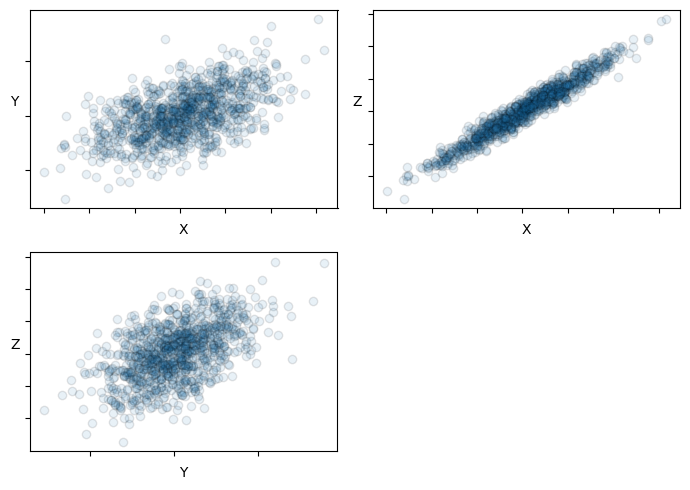

In [6]:
fig = plt.figure(figsize=(7,5))
#plt.suptitle("SPLS", fontsize=25)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x=x, y=y, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Y', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x=x, y=z, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('X')
ax.set_ylabel('Z', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x=y, y=z, alpha=0.1, linewidth=1, edgecolor='black')
ax.set_xlabel('Y')
ax.set_ylabel('Z', rotation=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [7]:
df = pd.DataFrame({'x':x,
              'y':y,
              'z':z,
             })
df.head()

,x,y,z
0,-0.402680,2.820512,4.643472
1,-0.628696,2.828314,4.650375
2,0.927449,3.146056,6.279473
3,0.710682,2.720330,5.650399
4,-0.430084,2.997235,4.752027


In [8]:
df.to_csv('data/model_collider.csv', index=False)

In [20]:
mod = smf.ols(formula='z ~ x + y', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:52:47   Log-Likelihood:                 184.27
No. Observations:                1000   AIC:                            -362.5
Df Residuals:                     997   BIC:                            -347.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0034      0.006      0.530      0.5

In [21]:
res.pvalues

Intercept     5.963407e-01
x            4.792437e-321
y             4.867470e-01
dtype: float64